<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import yfinance
import yfinance as yf

# Get the data for the stock TSLA
start = '2014-09-17'

In [3]:
# Tesla prediction

In [4]:
# Bringing data from yfinance to dataframe - Tesla
df = yf.download('TSLA',start)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Bringing data into csv file
df.to_csv('tesla_data.csv', encoding='utf-8', index=True)

In [6]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00-04:00,17.493999,17.646667,17.299999,17.425333,17.425333,77665500
2014-09-18 00:00:00-04:00,17.557333,17.706667,17.488001,17.587999,17.587999,55389000
2014-09-19 00:00:00-04:00,17.199333,17.428667,17.018000,17.288000,17.288000,102163500
2014-09-22 00:00:00-04:00,17.000000,17.068001,16.313999,16.668667,16.668667,123211500
2014-09-23 00:00:00-04:00,16.348000,16.920000,16.333332,16.694000,16.694000,84880500


In [7]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

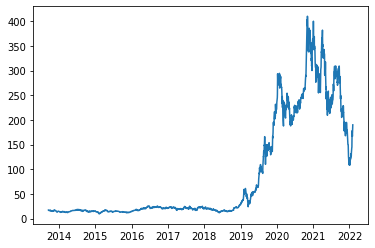

In [8]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [9]:
# length of dataframe
len(df)

2111

In [10]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [11]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[17.42533302307129,
 17.58799934387207,
 17.288000106811523,
 16.66866683959961,
 16.694000244140625,
 16.80933380126953,
 16.463333129882812,
 16.440000534057617,
 16.35066795349121,
 16.178667068481445,
 16.016000747680664,
 16.761333465576172,
 17.013999938964844,
 17.374666213989258,
 17.30466651916504,
 17.28533363342285,
 17.134000778198242,
 15.793999671936035,
 14.97266674041748,
 15.137332916259766,
 15.313332557678223,
 15.09000015258789,
 15.165332794189453,
 15.364666938781738,
 15.689332962036133,
 15.40666675567627,
 15.685999870300293,
 15.682666778564453,
 14.777999877929688,
 16.184667587280273,
 15.873332977294922,
 15.910667419433594,
 16.113332748413086,
 16.172666549682617,
 15.928667068481445,
 15.39799976348877,
 16.08133316040039,
 16.01333236694336,
 16.1286678314209,
 16.738666534423828,
 16.606666564941406,
 16.780000686645508,
 17.245332717895508,
 16.93199920654297,
 17.18000030517578,
 16.516000747680664,
 16.58066749572754,
 16.185333251953125,
 16.447999

In [12]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[201.7066650390625,
 190.94667053222656,
 199.68333435058594,
 201.7100067138672,
 201.19667053222656,
 199.5933380126953,
 203.3733367919922,
 203.29666137695312,
 205.89666748046875,
 199.7866668701172,
 201.6233367919922,
 205.53334045410156,
 207.77000427246094,
 206.94332885742188,
 207.90333557128906,
 218.85667419433594,
 226.60667419433594,
 223.9566650390625,
 229.57333374023438,
 226.9199981689453,
 226.56666564941406,
 225.97332763671875,
 226.3000030517578,
 219.86000061035156,
 214.88333129882812,
 217.60333251953125,
 218.98333740234375,
 228.56666564941406,
 222.84666442871094,
 217.7933349609375,
 216.86666870117188,
 214.74000549316406,
 215.4066619873047,
 220.1666717529297,
 218.42999267578125,
 216.4199981689453,
 214.4600067138672,
 219.2066650390625,
 214.92666625976562,
 215.66000366210938,
 225.78334045410156,
 229.06666564941406,
 236.55667114257812,
 236.5800018310547,
 236.97332763671875,
 238.2100067138672,
 233.03334045410156,
 237.9199981689453,
 236.66333

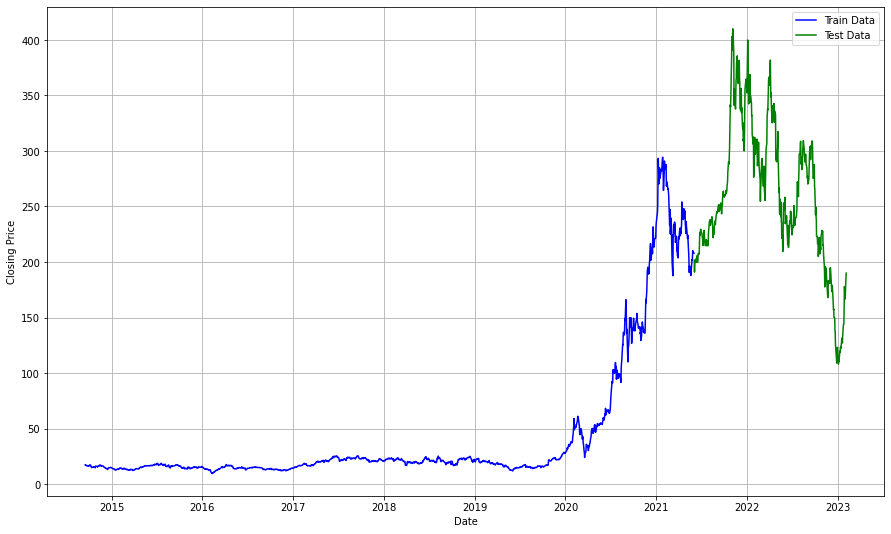

In [13]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [14]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [15]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [16]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2109
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -6563.265
Method:                       css-mle   S.D. of innovations              5.436
Date:                Sat, 04 Feb 2023   AIC                          13138.529
Time:                        15:55:58   BIC                          13172.453
Sample:                             1   HQIC                         13150.952
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.122      0.665      0.506      -0.158       0.321
ar.L1.D.y     -0.0362      0.022     -1.662      0.096      -0.079       0.006
ar.L2.D.y      0.0138      0.022      0.635      0.5

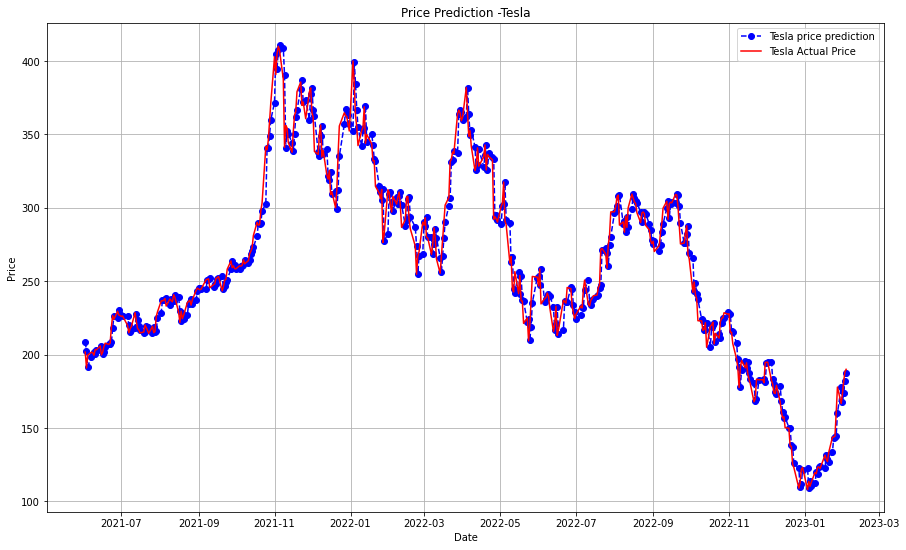

In [17]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Tesla price prediction')
plt.plot(start_date, test, color ='red', label ='Tesla Actual Price')
plt.title('Price Prediction -Tesla')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.028999197573844535


MAPE of 2.9% implies the model is 97.1% accurate in predicting the test obeservations

In [19]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 260.5147046749755
Mean Squared Error: 10.4924147453542


In [20]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 190.4567152973769
Prediction 201.854415703867
Prediction 191.9486361716203
Prediction 199.4030854268023
Prediction 202.36672557528232


In [21]:
# Converting list to dataframe 
Prediction = pd.DataFrame(prediction_next_5_days)

In [22]:
#Reviewing dataframe
Prediction

,0
0,190.456715
1,201.854416
2,191.948636
3,199.403085
4,202.366726


In [23]:
#Converting dataframe to csv for visualization
Prediction.to_csv('Tesla_prediction.csv', header='Prediction', index=True)